In [90]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Stations
import pandas as pd

In [91]:
cologne = Point(50.9375, 6.9603, 53)

In [92]:
cologne.get_stations()

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance,score
id,,,,,,,,,,,,,,,,,
D2968,Köln-Stammheim,DE,NW,<NA>,<NA>,50.9894,6.9777,43.0,Europe/Berlin,1951-01-01,2022-10-01,1945-01-01,2022-10-01,1945-01-01,2022-01-01,5898.264867,0.887458
10513,Köln-Bonn Airport,DE,NW,10513,EDDK,50.8667,7.1667,91.0,Europe/Berlin,1931-01-01,2022-10-03,1931-01-01,2022-10-01,1931-01-01,2022-01-01,16476.260952,0.674121
D1024,Dormagen-Zons,DE,NW,<NA>,<NA>,51.1157,6.8510,37.0,Europe/Berlin,2006-08-01,2022-10-01,2006-08-02,2022-04-25,2006-01-01,2022-01-01,21238.269087,0.617630
10505,Bonn-Hangelar,DE,NRW,10505,<NA>,50.7667,7.1667,60.0,Europe/Berlin,2018-01-27,2022-10-03,2011-04-01,2022-04-24,2011-01-01,2022-01-01,23888.035821,0.582491


# Cologne Stammheim

In [93]:
stations = Stations()
stations = stations.nearby(50.9894, 6.977)
station_stammheim = stations.fetch(1)

In [94]:
station_stammheim

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance
id,,,,,,,,,,,,,,,,
D2968,Köln-Stammheim,DE,NW,<NA>,<NA>,50.9894,6.9777,43.0,Europe/Berlin,1951-01-01,2022-10-01,1945-01-01,2022-10-01,1945-01-01,2022-01-01,48.995254


# Cologne Airport

In [95]:
stations = Stations()
stations = stations.nearby(50.8667, 7.1667)
station_airport = stations.fetch(1)

In [96]:
station_airport

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance
id,,,,,,,,,,,,,,,,
10513,Köln-Bonn Airport,DE,NW,10513,EDDK,50.8667,7.1667,91.0,Europe/Berlin,1931-01-01,2022-10-03,1931-01-01,2022-10-01,1931-01-01,2022-01-01,0.0


In [97]:
start = datetime(2022, 9, 1)
end = datetime(2022, 10, 1)
data_airport = Daily(station_airport, start, end)
data_airport = data_airport.fetch()
data_stammheim = Daily(station_stammheim, start, end)
data_stammheim = data_stammheim.fetch()
df_concat = pd.concat((data_airport, data_stammheim))
by_row_index = df_concat.groupby(df_concat.index)
df_means = by_row_index.mean()
df_means.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2022-09-01,20.30,12.2,26.35,0.00,NaN,108.5,10.85,37.8,1018.95,730.0
2022-09-02,20.90,15.9,26.50,0.00,NaN,112.0,15.00,43.2,1014.70,606.0
2022-09-03,19.10,15.4,25.95,1.45,NaN,123.5,12.50,34.6,1012.05,280.0
2022-09-04,20.65,14.0,27.70,0.00,NaN,140.5,7.35,19.1,1017.35,651.0
2022-09-05,22.75,15.2,30.80,0.30,NaN,118.0,8.30,25.2,1018.55,533.0


<AxesSubplot:xlabel='time'>

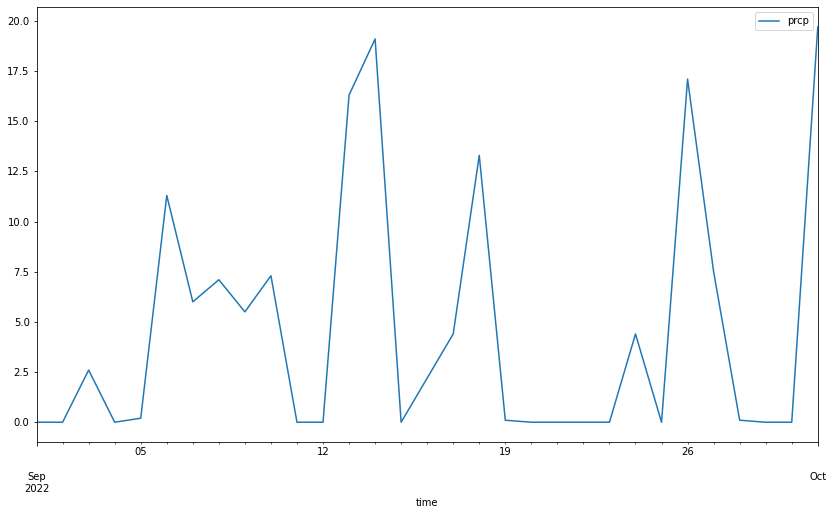

In [98]:
data_airport.plot(y=['prcp'], figsize=(14,8))

<AxesSubplot:xlabel='time'>

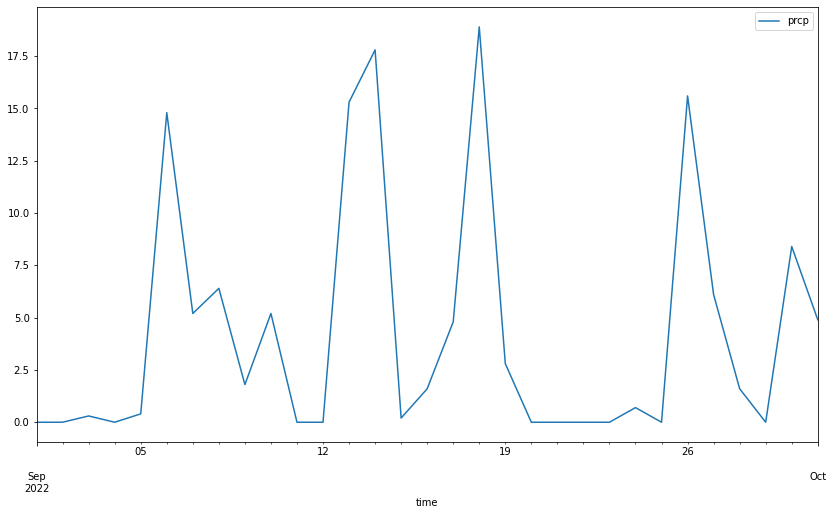

In [99]:
data_stammheim.plot(y=['prcp'], figsize=(14,8))

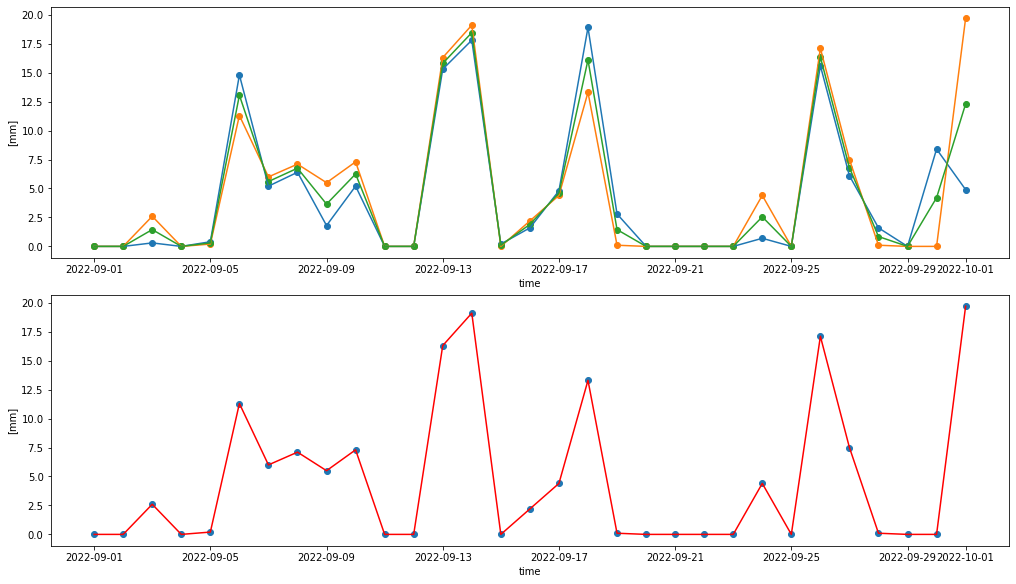

In [100]:
fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True, sharey=True, figsize=(14, 8))
ax1.scatter(data_stammheim.index, data_stammheim['prcp'])
ax1.plot(data_stammheim.index, data_stammheim['prcp'])
ax1.scatter(data_airport.index, data_airport['prcp'])
ax1.plot(data_airport.index, data_airport['prcp'])
ax1.scatter(df_means.index, df_means['prcp'])
ax1.plot(df_means.index, df_means['prcp'])
ax1.set_xlabel('time')
ax1.set_ylabel('[mm]')

ax2.scatter(data_airport.index, data_airport['prcp'])
ax2.plot(data_airport.index, data_airport['prcp'], color='r')
ax2.set_xlabel('time')
ax2.set_ylabel('[mm]')
plt.show()

# Daily Data December 2021 - February 2022

In [101]:
start = datetime(2021, 12, 15)
end = datetime(2022, 2, 21)
data_airport = Daily(station_airport, start, end)
data_airport = data_airport.fetch()
data_stammheim = Daily(station_stammheim, start, end)
data_stammheim = data_stammheim.fetch()
df_concat = pd.concat((data_airport, data_stammheim))
by_row_index = df_concat.groupby(df_concat.index)
df_means = by_row_index.mean()
df_means.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2021-12-15,8.75,7.85,10.00,0.05,0.0,195.0,6.00,16.6,1031.55,2.0
2021-12-16,8.65,6.95,9.80,0.00,0.0,208.5,4.50,14.8,1036.95,0.0
2021-12-17,7.55,1.95,9.05,0.05,0.0,66.5,4.25,14.8,1039.55,0.0
2021-12-18,4.40,1.45,6.05,0.35,0.0,230.5,4.80,16.6,1038.55,0.0
2021-12-19,5.95,5.60,6.50,0.15,0.0,293.5,11.80,29.5,1031.15,0.0


In [102]:
df_concat = pd.concat((data_airport, data_stammheim))
by_row_index = df_concat.groupby(df_concat.index)
df_means = by_row_index.mean()
df_means.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2021-12-15,8.75,7.85,10.00,0.05,0.0,195.0,6.00,16.6,1031.55,2.0
2021-12-16,8.65,6.95,9.80,0.00,0.0,208.5,4.50,14.8,1036.95,0.0
2021-12-17,7.55,1.95,9.05,0.05,0.0,66.5,4.25,14.8,1039.55,0.0
2021-12-18,4.40,1.45,6.05,0.35,0.0,230.5,4.80,16.6,1038.55,0.0
2021-12-19,5.95,5.60,6.50,0.15,0.0,293.5,11.80,29.5,1031.15,0.0


In [103]:
data_airport.head(10)

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2021-12-15,8.4,7.4,9.8,0.1,0.0,177.0,5.4,16.6,1031.3,2.0
2021-12-16,8.4,6.0,9.9,0.0,0.0,118.0,4.0,14.8,1036.6,0.0
2021-12-17,7.0,0.7,8.5,0.0,0.0,110.0,4.3,14.8,1039.0,0.0
2021-12-18,3.6,-0.1,5.6,0.4,0.0,181.0,4.7,16.6,1038.1,0.0
2021-12-19,5.7,5.3,6.2,0.1,0.0,292.0,10.8,29.5,1030.5,0.0
2021-12-20,3.2,-3.9,6.8,0.0,0.0,42.0,9.0,20.5,1026.8,346.0
2021-12-21,-2.3,-7.6,3.6,0.0,0.0,116.0,6.5,13.0,1026.1,389.0
2021-12-22,-1.3,-6.2,2.0,0.0,0.0,118.0,13.7,31.3,1023.9,315.0
2021-12-23,2.2,-1.3,7.2,0.7,0.0,126.0,15.5,36.4,1011.3,2.0


In [104]:
data_stammheim.head(20)

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2021-12-15,9.1,8.3,10.2,0.0,NaN,213.0,6.6,NaN,1031.8,NaN
2021-12-16,8.9,7.9,9.7,0.0,NaN,299.0,5.0,NaN,1037.3,NaN
2021-12-17,8.1,3.2,9.6,0.1,NaN,23.0,4.2,NaN,1040.1,NaN
2021-12-18,5.2,3.0,6.5,0.3,NaN,280.0,4.9,NaN,1039.0,NaN
2021-12-19,6.2,5.9,6.8,0.2,NaN,295.0,12.8,NaN,1031.8,NaN
2021-12-20,4.5,-1.6,7.3,0.0,NaN,40.0,7.4,NaN,1027.9,NaN
2021-12-21,-1.0,-3.9,3.7,0.0,NaN,106.0,5.6,NaN,1027.1,NaN
2021-12-22,-0.5,-3.1,2.4,0.0,NaN,129.0,13.3,NaN,1025.1,NaN
2021-12-23,2.7,-0.4,9.3,2.5,NaN,157.0,11.6,NaN,1012.9,NaN


<AxesSubplot:xlabel='time'>

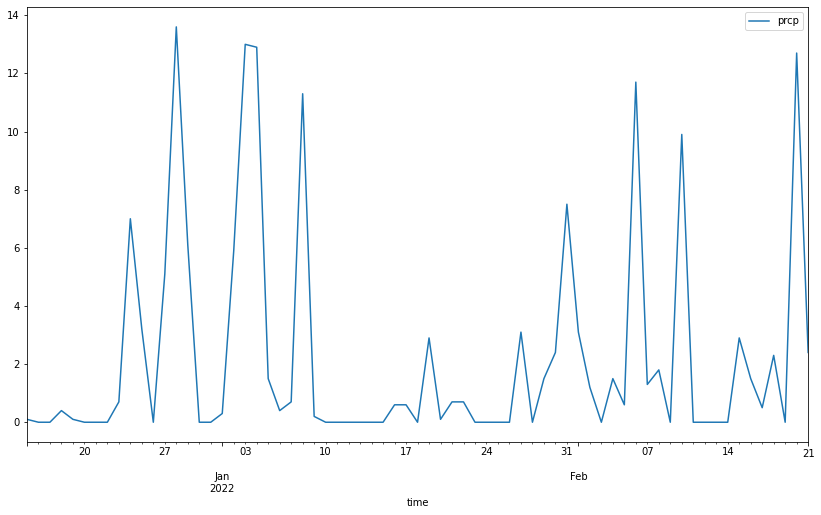

In [105]:
data_airport.plot(y=['prcp'], figsize=(14,8))

<AxesSubplot:xlabel='time'>

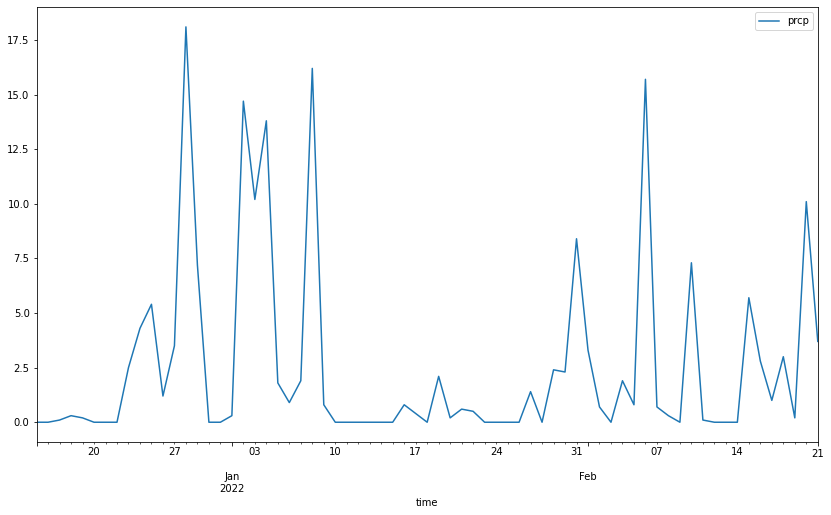

In [106]:
data_stammheim.plot(y=['prcp'], figsize=(14,8))

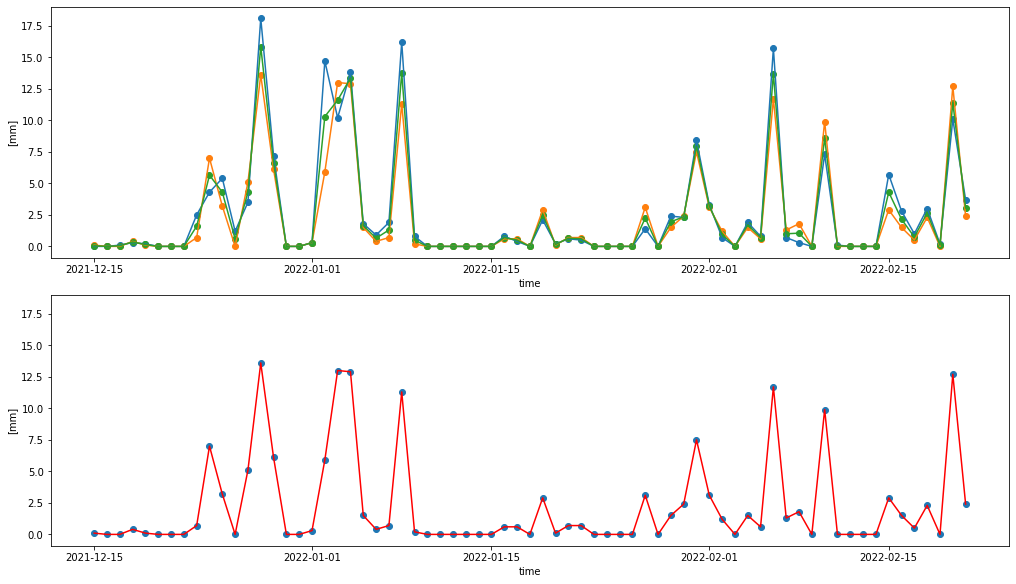

In [107]:
fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True, sharey=True, figsize=(14, 8))
ax1.scatter(data_stammheim.index, data_stammheim['prcp'])
ax1.plot(data_stammheim.index, data_stammheim['prcp'])
ax1.scatter(data_airport.index, data_airport['prcp'])
ax1.plot(data_airport.index, data_airport['prcp'])
ax1.scatter(df_means.index, df_means['prcp'])
ax1.plot(df_means.index, df_means['prcp'])
ax1.set_xlabel('time')
ax1.set_ylabel('[mm]')

ax2.scatter(data_airport.index, data_airport['prcp'])
ax2.plot(data_airport.index, data_airport['prcp'], color='r')
ax2.set_xlabel('time')
ax2.set_ylabel('[mm]')
plt.show()

# June - July 2021

In [108]:
start = datetime(2021, 6, 1)
end = datetime(2021, 7, 31)

In [109]:
data_airport = Daily(station_airport, start, end)
data_airport = data_airport.fetch()
data_stammheim = Daily(station_stammheim, start, end)
data_stammheim = data_stammheim.fetch()
df_concat = pd.concat((data_airport, data_stammheim))
by_row_index = df_concat.groupby(df_concat.index)
df_means = by_row_index.mean()
df_means.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2021-06-01,19.15,9.60,25.65,0.00,0.0,118.5,11.75,42.5,1017.10,915.0
2021-06-02,21.05,9.85,28.10,0.05,0.0,130.5,11.70,38.9,1014.95,859.0
2021-06-03,20.30,17.10,24.75,2.30,0.0,145.0,7.95,25.9,1019.05,181.0
2021-06-04,21.05,16.15,28.05,22.90,0.0,118.0,6.35,53.6,1019.75,405.0
2021-06-05,17.55,14.80,21.70,0.35,0.0,254.5,10.95,36.4,1019.80,5.0


<AxesSubplot:xlabel='time'>

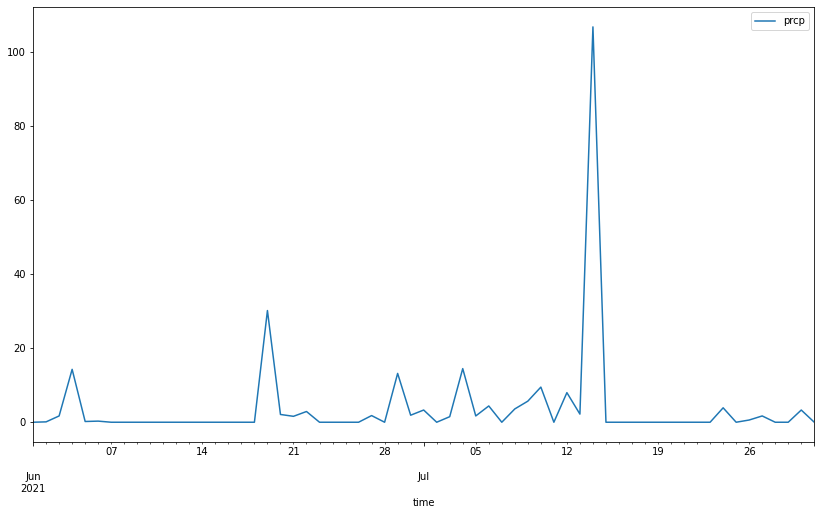

In [110]:
data_airport.plot(y=['prcp'], figsize=(14,8))

<AxesSubplot:xlabel='time'>

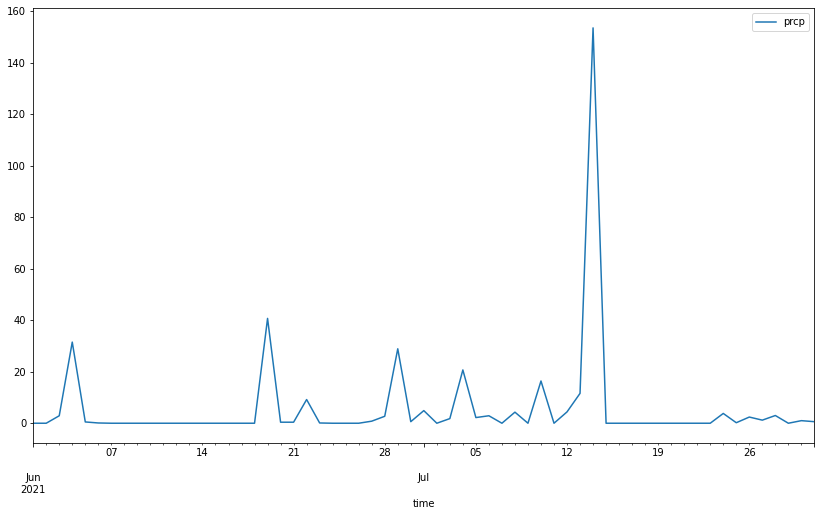

In [111]:
data_stammheim.plot(y=['prcp'], figsize=(14,8))

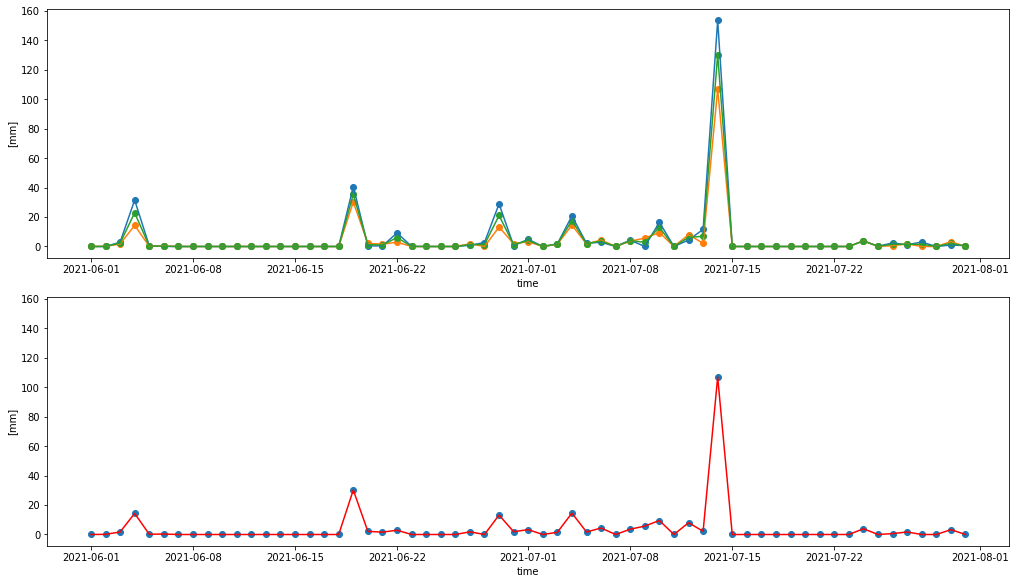

In [112]:
fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True, sharey=True, figsize=(14, 8))
ax1.scatter(data_stammheim.index, data_stammheim['prcp'])
ax1.plot(data_stammheim.index, data_stammheim['prcp'])
ax1.scatter(data_airport.index, data_airport['prcp'])
ax1.plot(data_airport.index, data_airport['prcp'])
ax1.scatter(df_means.index, df_means['prcp'])
ax1.plot(df_means.index, df_means['prcp'])
ax1.set_xlabel('time')
ax1.set_ylabel('[mm]')

ax2.scatter(data_airport.index, data_airport['prcp'])
ax2.plot(data_airport.index, data_airport['prcp'], color='r')
ax2.set_xlabel('time')
ax2.set_ylabel('[mm]')
plt.show()

# June 2021

In [113]:
start = datetime(2021, 2, 1)
end = datetime(2021, 6, 5)
data_airport = Daily(station_airport, start, end)
data_airport = data_airport.fetch()
data_stammheim = Daily(station_stammheim, start, end)
data_stammheim = data_stammheim.fetch()
df_concat = pd.concat((data_airport, data_stammheim))
by_row_index = df_concat.groupby(df_concat.index)
df_means = by_row_index.mean()
df_means.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2021-02-01,3.6,1.85,5.35,0.85,0.0,148.5,11.70,25.9,994.55,0.0
2021-02-02,6.8,3.40,10.95,4.10,0.0,198.5,12.50,37.1,1000.95,0.0
2021-02-03,9.9,7.50,13.40,11.90,0.0,197.5,15.65,48.6,998.25,40.0
2021-02-04,7.9,4.30,11.00,0.00,0.0,214.0,13.20,37.1,1012.20,410.0
2021-02-05,8.3,6.60,11.35,1.20,0.0,129.0,10.80,24.1,1011.55,31.0


<AxesSubplot:xlabel='time'>

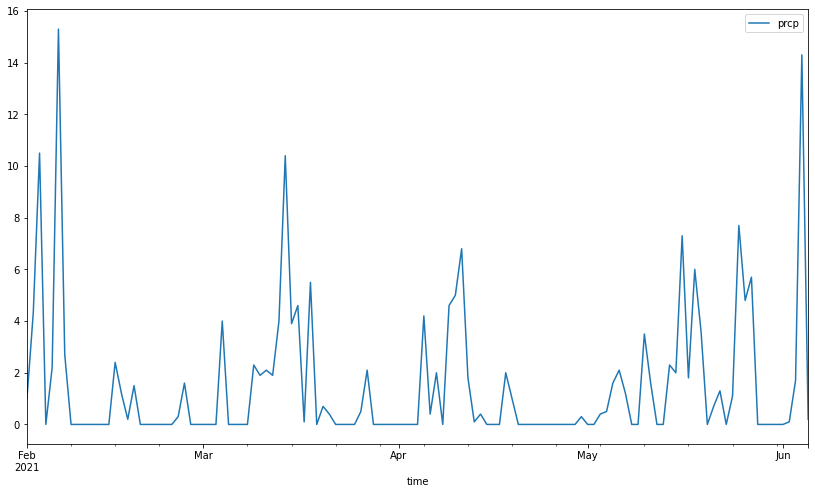

In [114]:
data_airport.plot(y=['prcp'], figsize=(14,8))

<AxesSubplot:xlabel='time'>

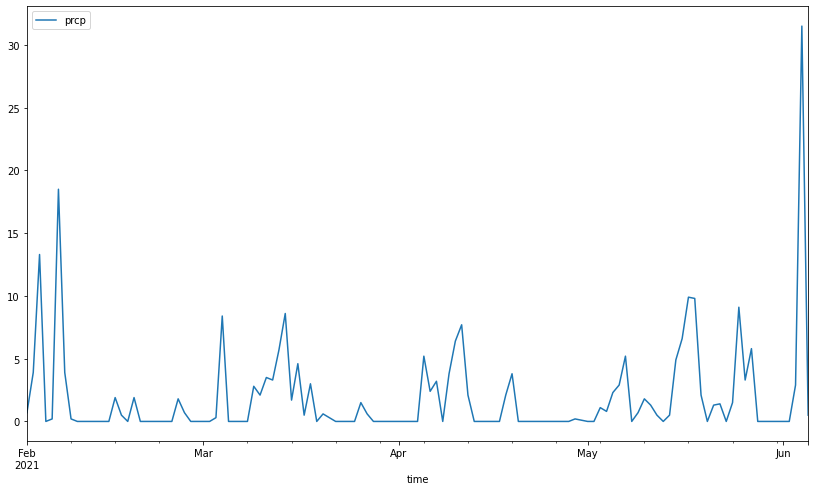

In [115]:
data_stammheim.plot(y=['prcp'], figsize=(14,8))

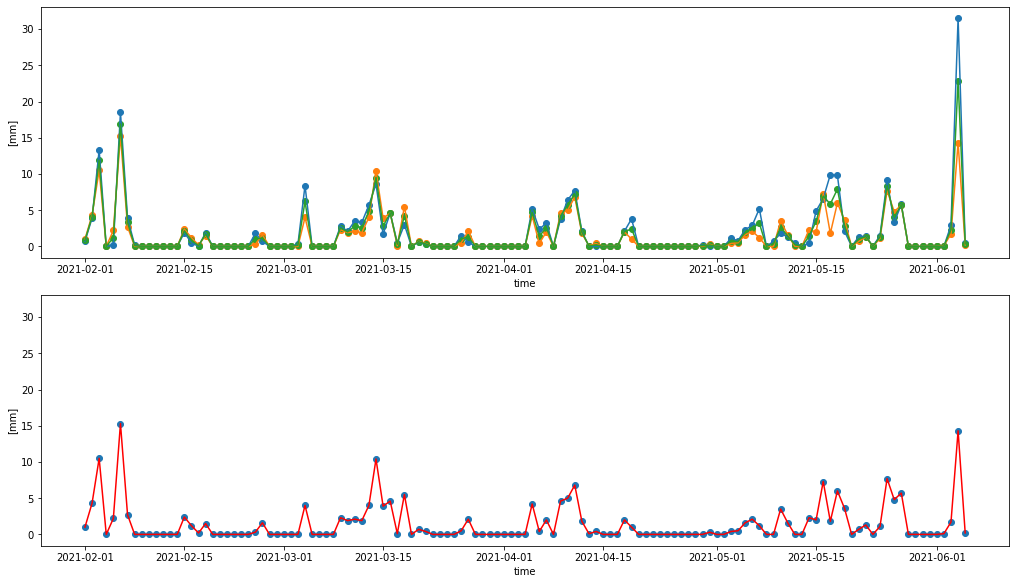

In [116]:
fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True, sharey=True, figsize=(14, 8))
ax1.scatter(data_stammheim.index, data_stammheim['prcp'])
ax1.plot(data_stammheim.index, data_stammheim['prcp'])
ax1.scatter(data_airport.index, data_airport['prcp'])
ax1.plot(data_airport.index, data_airport['prcp'])
ax1.scatter(df_means.index, df_means['prcp'])
ax1.plot(df_means.index, df_means['prcp'])
ax1.set_xlabel('time')
ax1.set_ylabel('[mm]')

ax2.scatter(data_airport.index, data_airport['prcp'])
ax2.plot(data_airport.index, data_airport['prcp'], color='r')
ax2.set_xlabel('time')
ax2.set_ylabel('[mm]')
plt.show()

# February 2020

In [117]:
start = datetime(2020, 1, 1)
end = datetime(2020, 2, 28)

In [118]:
data_airport = Daily(station_airport, start, end)
data_airport = data_airport.fetch()
data_stammheim = Daily(station_stammheim, start, end)
data_stammheim = data_stammheim.fetch()
df_concat = pd.concat((data_airport, data_stammheim))
by_row_index = df_concat.groupby(df_concat.index)
df_means = by_row_index.mean()
df_means.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2020-01-01,1.40,-0.50,3.65,0.00,0.0,113.0,14.8,33.5,1032.4,151.0
2020-01-02,2.20,-1.35,5.50,0.00,0.0,134.0,12.6,29.5,1026.7,48.0
2020-01-03,7.85,4.45,10.45,1.85,0.0,201.0,20.2,53.6,1020.1,0.0
2020-01-04,5.50,2.70,7.25,1.15,0.0,270.0,14.8,40.0,1029.7,0.0
2020-01-05,6.45,5.15,7.45,0.00,0.0,231.0,8.3,20.9,1034.2,0.0


<AxesSubplot:xlabel='time'>

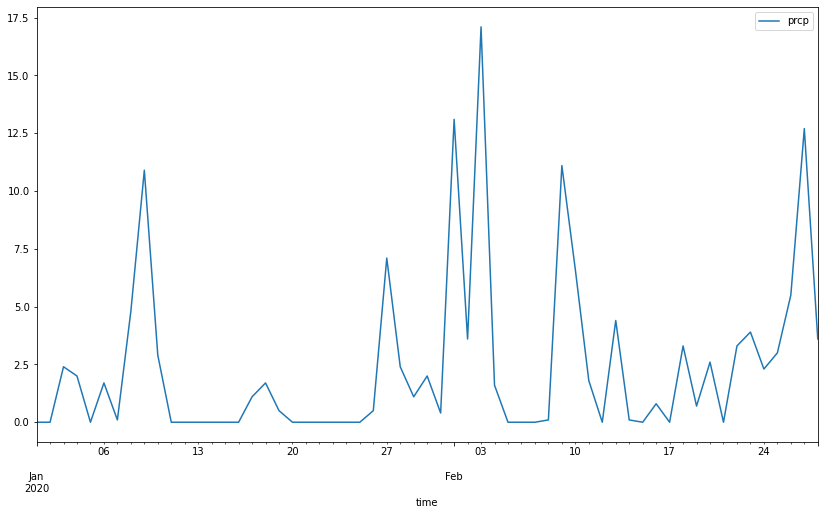

In [119]:
data_airport.plot(y=['prcp'], figsize=(14,8))

<AxesSubplot:xlabel='time'>

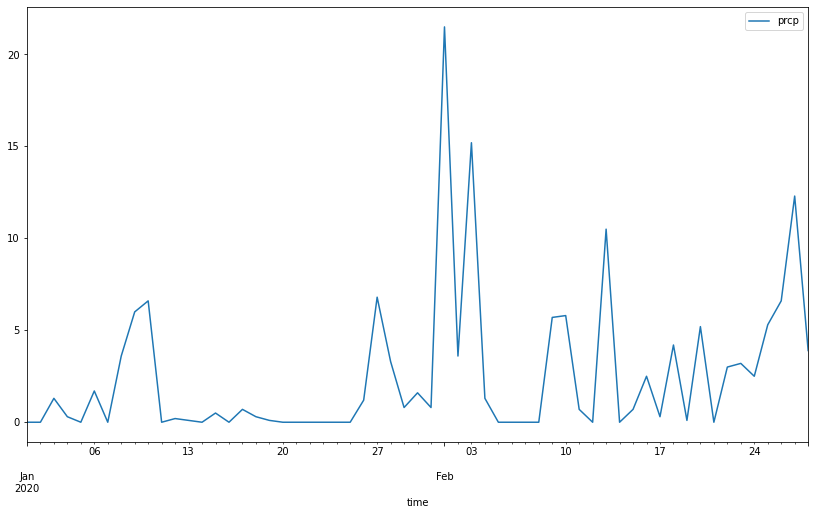

In [120]:
data_stammheim.plot(y=['prcp'], figsize=(14,8))

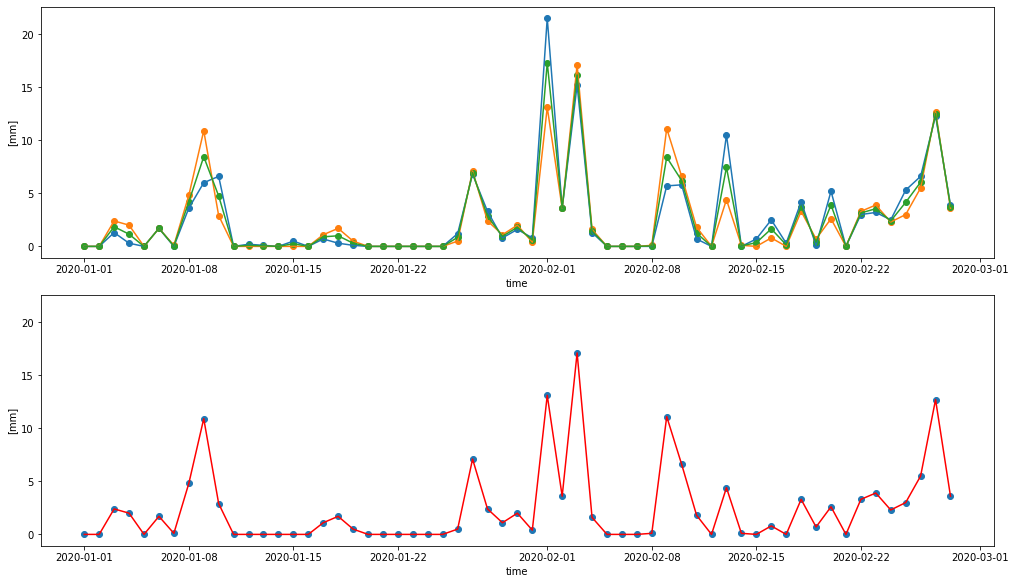

In [121]:
fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True, sharey=True, figsize=(14, 8))
ax1.scatter(data_stammheim.index, data_stammheim['prcp'])
ax1.plot(data_stammheim.index, data_stammheim['prcp'])
ax1.scatter(data_airport.index, data_airport['prcp'])
ax1.plot(data_airport.index, data_airport['prcp'])
ax1.scatter(df_means.index, df_means['prcp'])
ax1.plot(df_means.index, df_means['prcp'])
ax1.set_xlabel('time')
ax1.set_ylabel('[mm]')

ax2.scatter(data_airport.index, data_airport['prcp'])
ax2.plot(data_airport.index, data_airport['prcp'], color='r')
ax2.set_xlabel('time')
ax2.set_ylabel('[mm]')
plt.show()

# September - October 2018

In [122]:
start = datetime(2018, 8, 1)
end = datetime(2018, 10, 28)

In [123]:
data_airport = Daily(station_airport, start, end)
data_airport = data_airport.fetch()
data_stammheim = Daily(station_stammheim, start, end)
data_stammheim = data_stammheim.fetch()
df_concat = pd.concat((data_airport, data_stammheim))
by_row_index = df_concat.groupby(df_concat.index)
df_means = by_row_index.mean()
df_means.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2018-08-01,23.80,17.70,29.05,0.0,0.0,105.0,7.6,22.3,1019.3,378.0
2018-08-02,25.65,16.65,34.30,0.0,0.0,50.0,8.6,32.8,1020.5,840.0
2018-08-03,27.65,18.60,35.70,0.0,0.0,11.0,7.9,25.9,1019.1,816.0
2018-08-04,27.40,21.00,34.15,0.0,0.0,347.0,13.3,37.8,1017.3,654.0
2018-08-05,23.60,16.60,29.15,0.0,0.0,351.0,13.0,33.8,1020.0,744.0


<AxesSubplot:xlabel='time'>

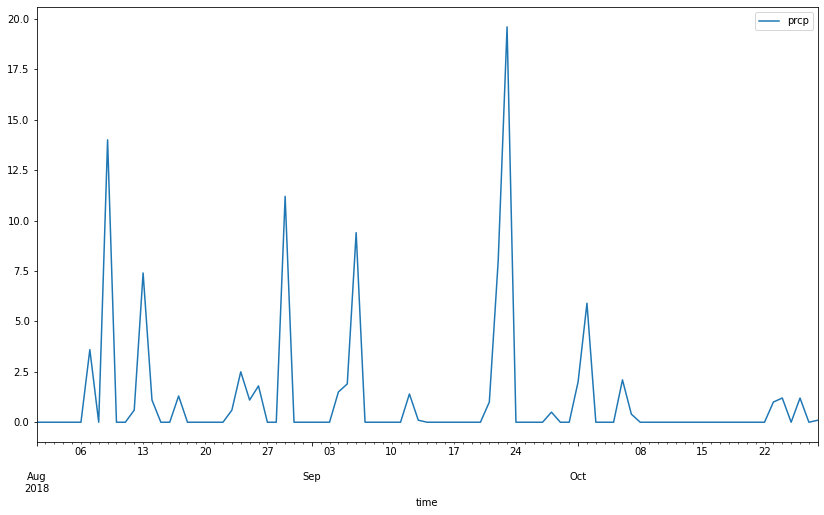

In [124]:
data_airport.plot(y=['prcp'], figsize=(14,8))

<AxesSubplot:xlabel='time'>

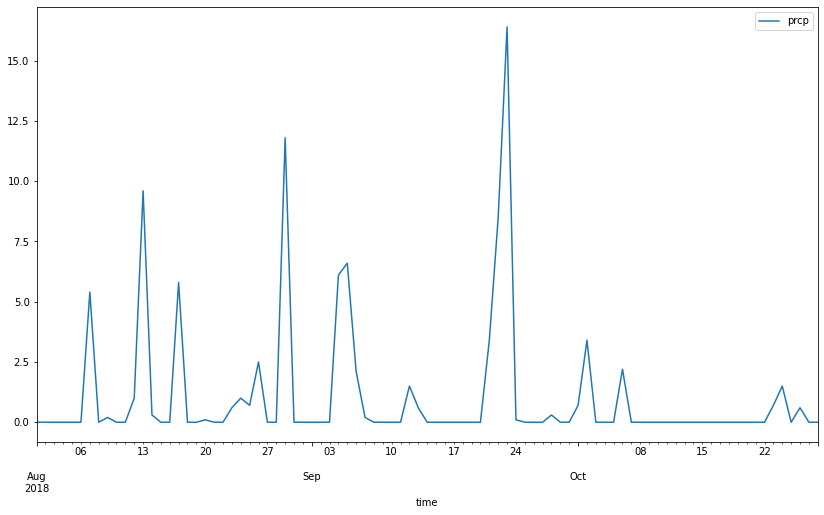

In [125]:
data_stammheim.plot(y=['prcp'], figsize=(14,8))

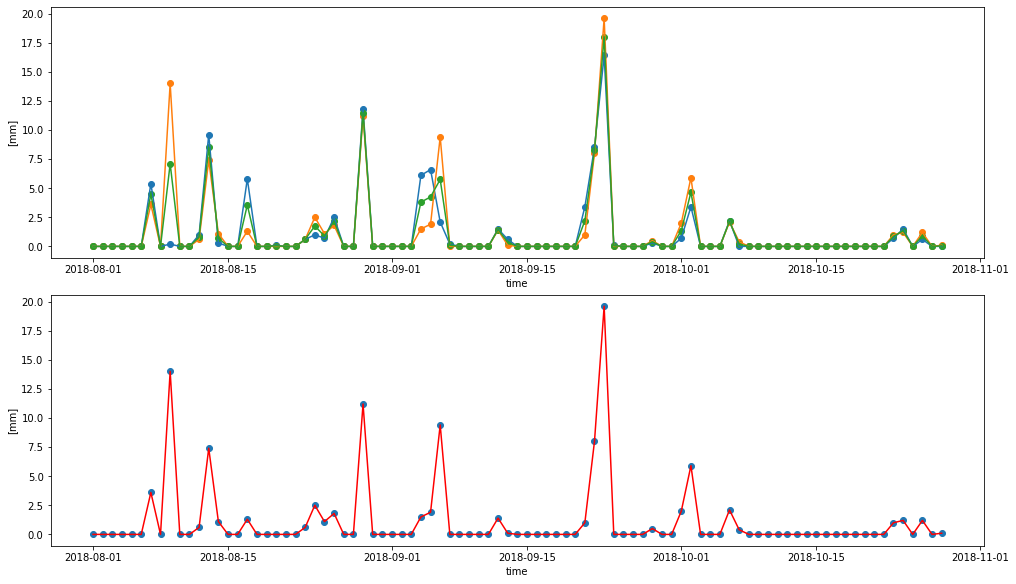

In [126]:
fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True, sharey=True, figsize=(14, 8))
ax1.scatter(data_stammheim.index, data_stammheim['prcp'])
ax1.plot(data_stammheim.index, data_stammheim['prcp'])
ax1.scatter(data_airport.index, data_airport['prcp'])
ax1.plot(data_airport.index, data_airport['prcp'])
ax1.scatter(df_means.index, df_means['prcp'])
ax1.plot(df_means.index, df_means['prcp'])
ax1.set_xlabel('time')
ax1.set_ylabel('[mm]')

ax2.scatter(data_airport.index, data_airport['prcp'])
ax2.plot(data_airport.index, data_airport['prcp'], color='r')
ax2.set_xlabel('time')
ax2.set_ylabel('[mm]')
plt.show()